TPOT1 and TPOTSteady use a standard evolutionary algorithm that evaluates exactly population_size individuals each generation. The next generation does not start until the previous is completely finished evaluating. This leads to underutilized CPU time as the cores are waiting for the last individuals to finish training. 

TPOTEstimatorSteadyState will generate and evaluate the next individual as soon as an individual finishes evaluation. The number of individuals being evaluated is determined by the n_jobs parameter. There is no longer a concept of generations. The population_size parameter now refers to the size of the list of evaluated parents. When an individual is evaluated, the selection method updates the list of parents. Then 

In [2]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.TPOTEstimatorSteadyState(  population_size=30,
                                     initial_population_size=30,
                            scorers=['roc_auc_ovr'], #scorers can be a list of strings or a list of scorers. These get evaluated during cross validation. 
                            scorers_weights=[1],

                            classification=True,
                            n_jobs=1,
                                                        #List of other objective functions. All objective functions take in an untrained GraphPipeline and return a score or a list of scores
                            other_objective_functions= [ ],
                            
                            #List of weights for the other objective functions. Must be the same length as other_objective_functions. By default, bigger is better is set to True. 
                            other_objective_functions_weights=[],

                            max_eval_time_seconds=15,
                            max_time_seconds=30,
                            verbose=2)


scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))


Evaluations: : 111it [00:30,  3.64it/s]


1.0


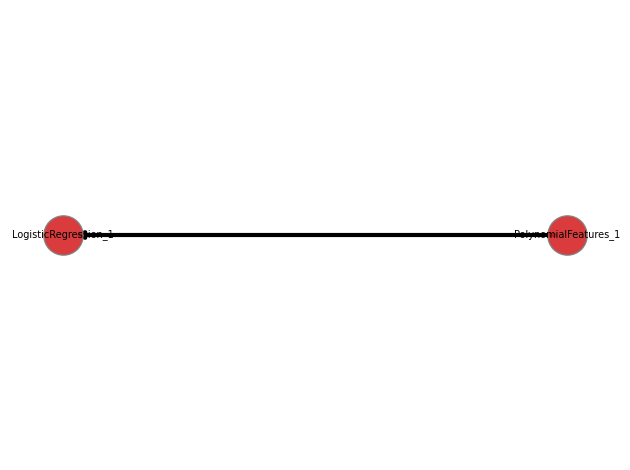

In [3]:
fitted_pipeline = est.fitted_pipeline_ # access best pipeline directly
fitted_pipeline.plot()

In [4]:
#view the summary of all evaluated individuals as a pandas dataframe
est.evaluated_individuals

,roc_auc_score,Parents,Variation_Function,Individual,Submitted Timestamp,Completed Timestamp,Pareto_Front,Instance
0,0.99631,NaN,NaN,['LogisticRegression_1'],1.690848e+09,1.690848e+09,NaN,['LogisticRegression_1']
1,0.982956,NaN,NaN,['DecisionTreeClassifier_1'],1.690848e+09,1.690848e+09,NaN,['DecisionTreeClassifier_1']
2,0.953313,NaN,NaN,['KNeighborsClassifier_1'],1.690848e+09,1.690848e+09,NaN,['KNeighborsClassifier_1']
3,0.5,NaN,NaN,['GradientBoostingClassifier_1'],1.690848e+09,1.690848e+09,NaN,['GradientBoostingClassifier_1']
4,0.983413,NaN,NaN,['ExtraTreesClassifier_1'],1.690848e+09,1.690848e+09,NaN,['ExtraTreesClassifier_1']
...,...,...,...,...,...,...,...,...
106,0.989742,"(104,)",mutate,"[('MLPClassifier_1', 'SelectPercentile_1')]",1.690848e+09,1.690848e+09,NaN,"[('MLPClassifier_1', 'SelectPercentile_1')]"
107,0.99631,"(12,)",mutate,['MLPClassifier_1'],1.690848e+09,1.690848e+09,NaN,['MLPClassifier_1']
108,0.99754,"(97, 93)",crossover_then_mutate,"[('MLPClassifier_1', 'PolynomialFeatures_1'), ...",1.690848e+09,1.690848e+09,NaN,"[('MLPClassifier_1', 'PolynomialFeatures_1'), ..."
109,0.989484,"(80, 61)",crossover,"[('MLPClassifier_1', 'FastICA_1')]",1.690848e+09,1.690848e+09,NaN,"[('MLPClassifier_1', 'FastICA_1')]"


In [5]:
#view pareto front as a pandas dataframe
est.pareto_front

,roc_auc_score,Parents,Variation_Function,Individual,Submitted Timestamp,Completed Timestamp,Pareto_Front,Instance
69,0.99754,"(51,)",mutate,"[('LogisticRegression_1', 'PolynomialFeatures_...",1.690848e+09,1.690848e+09,1.0,"[('LogisticRegression_1', 'PolynomialFeatures_..."


TPOTEstimator does a standard evolutionary algorithm. In this version, the next generation doesn't start evaluation until all individuals in the previous generation are finished evaluating.

In [1]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.TPOTEstimator(  population_size=30,
                            generations=5,
                            scorers=['roc_auc_ovr'], #scorers can be a list of strings or a list of scorers. These get evaluated during cross validation. 
                            scorers_weights=[1],
                            classification=True,
                            n_jobs=1, 
                            early_stop=5, #how many generations with no improvement to stop after
                            
                            #List of other objective functions. All objective functions take in an untrained GraphPipeline and return a score or a list of scores
                            other_objective_functions= [ ],
                            
                            #List of weights for the other objective functions. Must be the same length as other_objective_functions. By default, bigger is better is set to True. 
                            other_objective_functions_weights=[],
                            verbose=2)

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

Generation: 100%|██████████| 5/5 [00:35<00:00,  7.17s/it]


0.9947089947089948


The TPOTClassifier and TPOTRegressor are set default parameters for the TPOTEstimator for Classification and Regression.
In the future, a metalearner will be used to predict the best values for a given dataset.

In [5]:
import tpot2
import sklearn
import sklearn.metrics
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTRegressor(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

terminating parallel evaluation due to timeout
-4522.135573056978


In [6]:
import tpot2
import sklearn
import sklearn.datasets

est = tpot2.tpot_estimator.templates.TPOTClassifier(n_jobs=4, max_time_seconds=10)


scorer = sklearn.metrics.get_scorer('roc_auc_ovo')
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)
est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))

terminating parallel evaluation due to timeout
0.9999490921793659
